# Plotting distributions

In [1]:
set.seed(1234)
dat <- data.frame(cond = factor(rep(c("A","B"), each=200)), 
                   rating = c(rnorm(200),rnorm(200, mean=.8)))
# View first few rows
head(dat)
#>   cond     rating
#> 1    A -1.2070657
#> 2    A  0.2774292
#> 3    A  1.0844412
#> 4    A -2.3456977
#> 5    A  0.4291247
#> 6    A  0.5060559

library(ggplot2)
library(gridExtra)

,cond,rating
1,A,-1.207066
2,A,0.2774292
3,A,1.084441
4,A,-2.345698
5,A,0.4291247
6,A,0.5060559


# Histogram and density plots

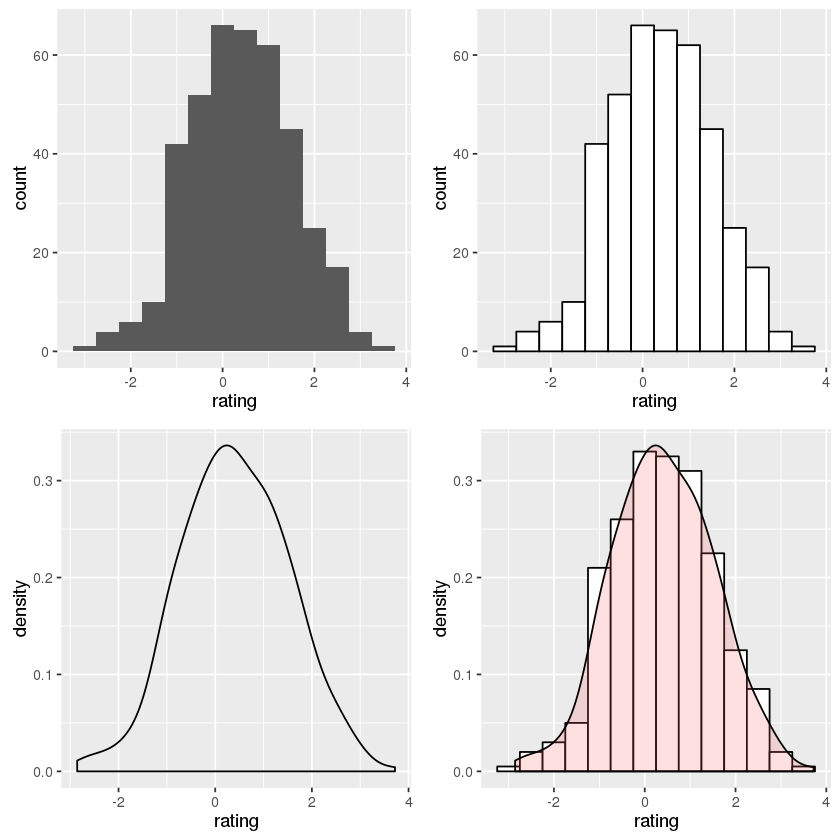

In [2]:

## Basic histogram from the vector "rating". Each bin is .5 wide.
## These both result in the same output:
p1<-ggplot(dat, aes(x=rating)) + geom_histogram(binwidth=.5)
# qplot(dat$rating, binwidth=.5)

# Draw with black outline, white fill
p2<-ggplot(dat, aes(x=rating)) +
    geom_histogram(binwidth=.5, colour="black", fill="white")

# Density curve
p3<-ggplot(dat, aes(x=rating)) + geom_density()

# Histogram overlaid with kernel density curve
p4<-ggplot(dat, aes(x=rating)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=.5,
                   colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")  # Overlay with transparent density plot
grid.arrange(p1, p2, p3, p4, nrow = 2, ncol =2, heights = c(0.65, 0.65))

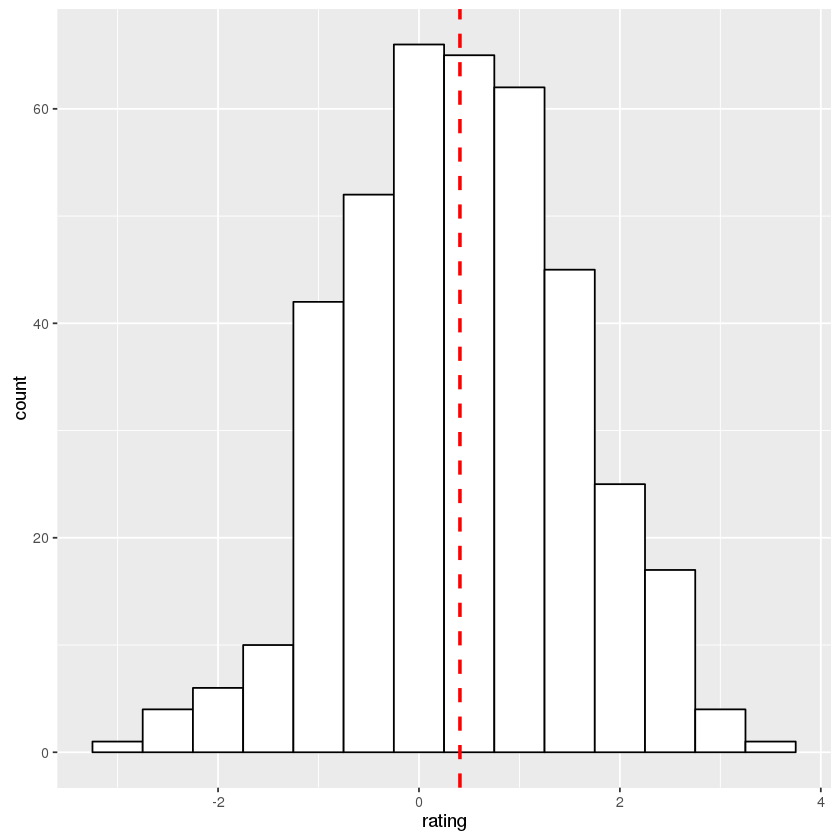

In [3]:
p5<-ggplot(dat, aes(x=rating)) +
    geom_histogram(binwidth=.5, colour="black", fill="white") +
    geom_vline(aes(xintercept=mean(rating, na.rm=T)),   # Ignore NA values for mean
               color="red", linetype="dashed", size=1)
grid.arrange(p5, nrow = 1, ncol =1, heights = c(0.65))

# Histogram and density plots with multiple groups

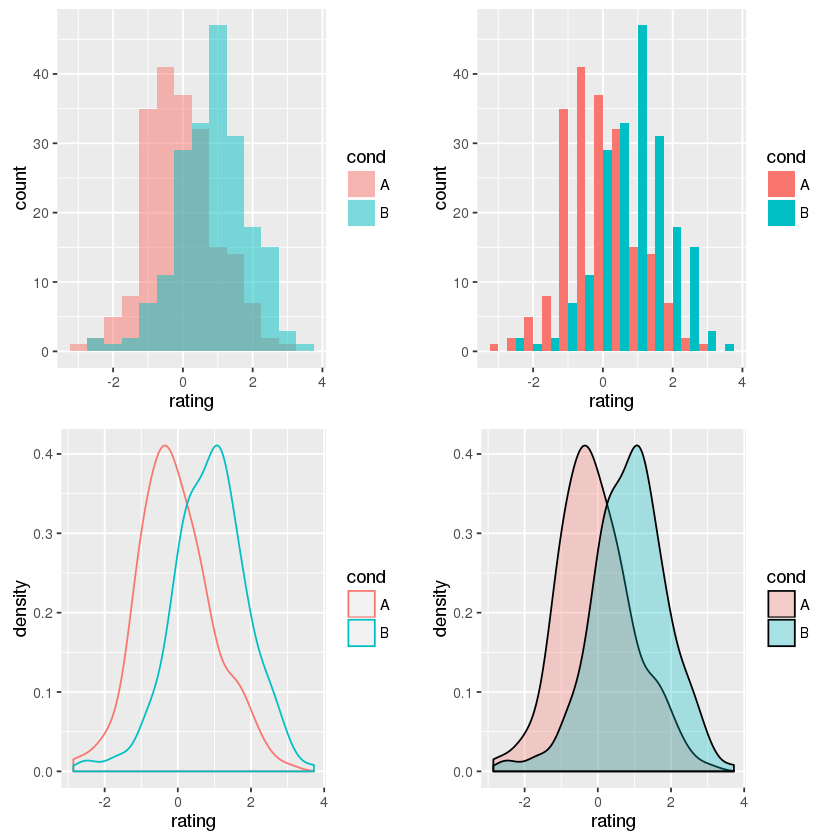

In [4]:
# Overlaid histograms
p6<-ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity")

# Interleaved histograms
p7<-ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, position="dodge")

# Density plots
p8<-ggplot(dat, aes(x=rating, colour=cond)) + geom_density()

# Density plots with semi-transparent fill
p9<-ggplot(dat, aes(x=rating, fill=cond)) + geom_density(alpha=.3)
grid.arrange(p6, p7, p8, p9, nrow = 2, ncol =2, heights = c(0.65, 0.65))

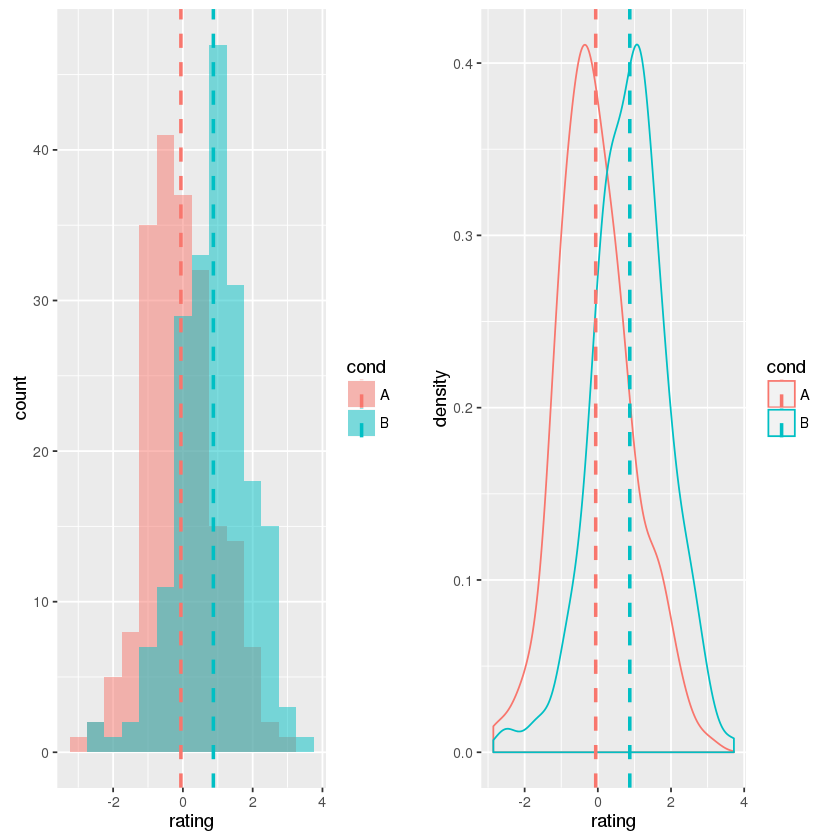

In [5]:
# Find the mean of each group
library(plyr)
cdat <- ddply(dat, "cond", summarise, rating.mean=mean(rating))
#cdat
#>   cond rating.mean
#> 1    A -0.05775928
#> 2    B  0.87324927

# Overlaid histograms with means
p10<-ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity") +
    geom_vline(data=cdat, aes(xintercept=rating.mean,  colour=cond),
               linetype="dashed", size=1)

# Density plots with means
p11<-ggplot(dat, aes(x=rating, colour=cond)) +
    geom_density() +
    geom_vline(data=cdat, aes(xintercept=rating.mean,  colour=cond),
               linetype="dashed", size=1)
grid.arrange(p10, p11, nrow = 1, ncol =2, widths = c(1, 1))

In [ ]:
p12<-ggplot(dat, aes(x=rating)) + geom_histogram(binwidth=.5, colour="black", fill="white") + 
    facet_grid(cond ~ .)

# With mean lines, using cdat from above
p13<-ggplot(dat, aes(x=rating)) + geom_histogram(binwidth=.5, colour="black", fill="white") + 
    facet_grid(cond ~ .) +
    geom_vline(data=cdat, aes(xintercept=rating.mean),
               linetype="dashed", size=1, colour="red")

# Box plots

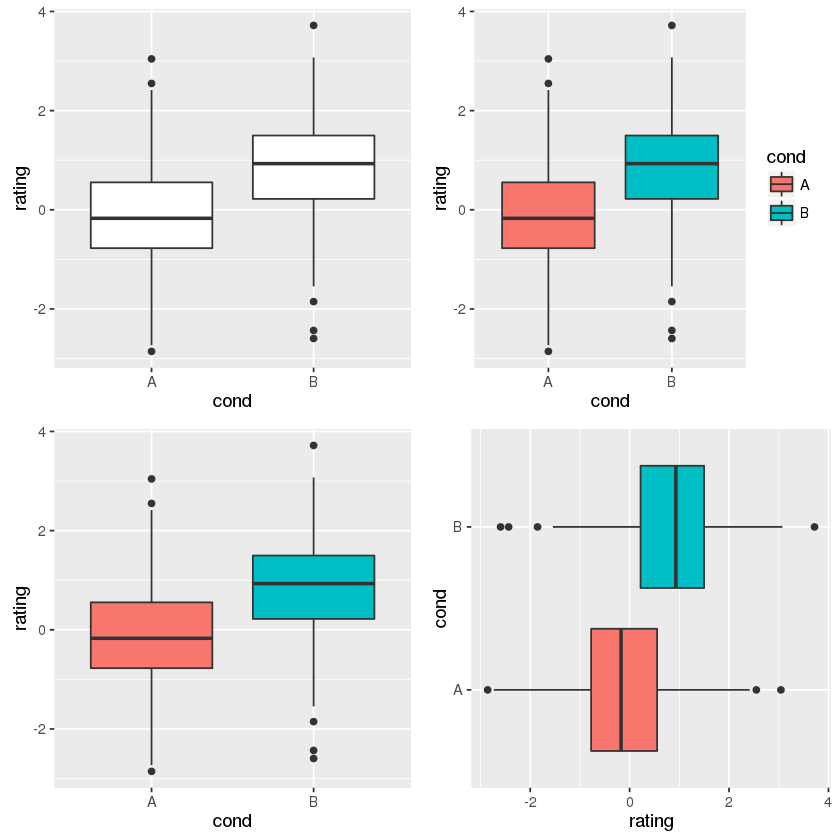

In [14]:
# A basic box plot
p14<-ggplot(dat, aes(x=cond, y=rating)) + geom_boxplot()

# A basic box with the conditions colored
p15<-ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot()

# The above adds a redundant legend. With the legend removed:
p16<-ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot() +
    guides(fill=FALSE)

# With flipped axes
p17<-ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot() + 
    guides(fill=FALSE) + coord_flip()
grid.arrange(p14, p15, p16, p17, nrow = 2, ncol =2, heights = c(0.65, 0.65))

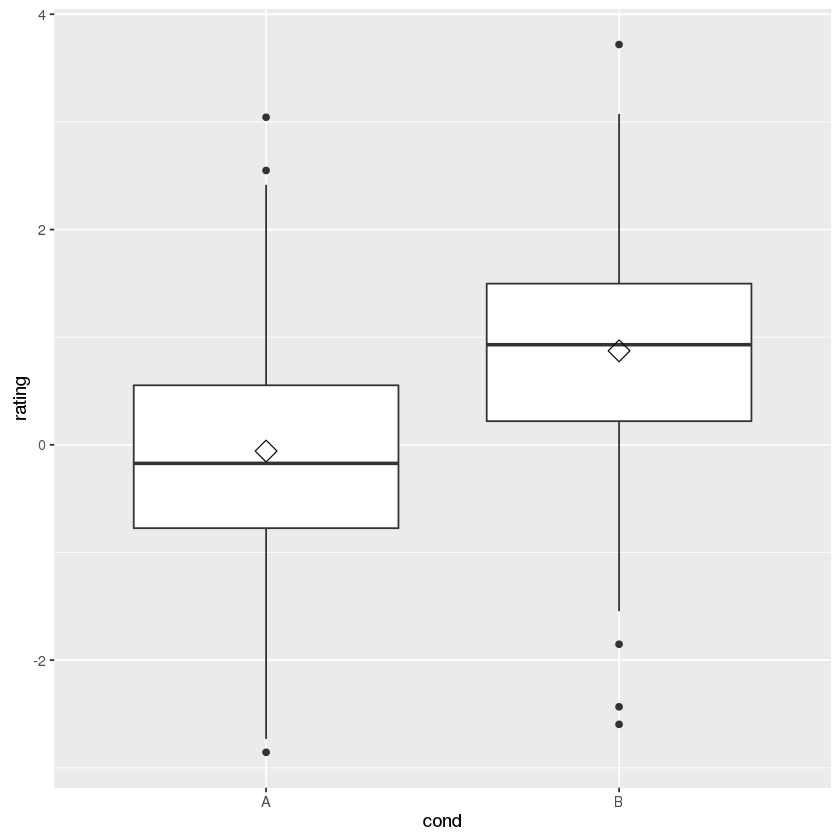

In [15]:
# Add a diamond at the mean, and make it larger
ggplot(dat, aes(x=cond, y=rating)) + geom_boxplot() +
    stat_summary(fun.y=mean, geom="point", shape=5, size=4)